# Project: WRANGLING AND ANALYZING WERATEDOGS DATA FROM TWITTER

# Table of Contents

> INTRODUCTION

> Gathering Data

> Assessing Data

> Cleaning Data


# INTRODUCTION

# PROBLEM DEFINITION
> Wrangling and Analyzing *WeRateDogs* data from twitter 

> This notebook looks into using python-based analytics and data wrangling in an attempt to get insights on the differnt dataset curated for this project.

# DATA
> All the Data came from Twitter

> There are three Datasets in this project. They includes

> * **Twitter Archive Dataset:** This was gotten from WeRateDogs twitter archive

> * **Tweets Image Predictions:** This data was downloaded programmatically from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

> * **Tweet JSON:** This data was gotten from twitter using API

# FEATURES
> The features of the data set used for this project includes
# Twitter Archive Dataset:
* 0).   tweet_id : identity of tweets                   
* 1).   in_reply_to_status_id : This allows API clients to specify which status a status to be posted is in reply to   
* 2).   in_reply_to_user_id : 
* 3).   timestamp : Time that the tweet was twitted                  
* 4).   source : Where the tweet was generated
* 5).   text : The tweet                     
* 6).   retweeted_status_id        
* 7).   retweeted_status_user_id    
* 8).   retweeted_status_timestamp  
* 9).   expanded_urls                
* 10).  rating_numerator : The rating numerator of the tweet          
* 11).  rating_denominator : The rating denominator of the tweet
* 12).  name : Name of the Dog                      
* 13).  doggo : A big Pupper usually older                    
* 14).  floofer : Dogs that have lots of fur                     
* 15).  pupper : A doggo that is inexperienced, unfamiliar, or in anyway unprepared for the responsibilities associated with being a doggo                   
* 16).  puppo : A transitional phase between doggo and pupper

# Tweets Image Predictions
 * 0).   tweet_id: Tweet_id is the last part of the tweet URL after "status/"
 * 1).   jpg_url : link to pictures of Dogs
 * 2).   img_num :   
 * 3).   p1 : This is the algorithm's #1 prediction for the image in the tweet
 * 4).   p1_conf : This is how confident the algorithm is in its #1 prediction
 * 5).   p1_dog  : This is whether or not the #1 prediction is a breed of dog    
 * 6).   p2  : This is the algorithm's second most likely prediction 
 * 7).   p2_conf : This is how confident the algorithm is in its #2 prediction
 * 8).   p2_dog  : This is whether or not the #2 prediction is a breed of dog   
 * 9).   p3  : This is the algorithm's third most likely prediction
 * 10).  p3_conf : This is how confident the algorithm is in its #3 prediction
 * 11).  p3_dog  :  This is whether or not the #3 prediction is a breed of dog 


# Tweets_count
* 0).  tweets_id : This is the last part of the tweet URL after "status/"    
* 1).  retweet_count : Number of retweets
* 2).  favorite_count : Number of likes

# QUESTIONS 
* 1). What are the most popular Dog breeds
* 2). Are retweets count and favorite count related in any way to each other?. 
* 3). What stage of dogs are the most common

In [1]:
import pandas as pd
import requests
import tweepy
import os
import json
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# import twitter archive csv file
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# test the code
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* Some expanded url have more than 1 urls in them one column
* There are missing data
* Floofer, Doggo, poppo and puppo rest are supposed to be in one column

In [5]:
# create a folder for the image prediction file and get the files programatically using request library
folder_name= 'image_predictions.tsv'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

# get image prediction file from udacity server
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_prediction= requests.get(url)
image_prediction

<Response [200]>

In [6]:
image_prediction.text

"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/m

In [7]:
# now let us get all the image prediction files
with open (os.path.join(folder_name, url.split('/')[-1]), mode= 'wb') as file:
    file.write(image_prediction.content)

In [8]:
# test the code
os.listdir(folder_name)

['image-predictions.tsv']

In [9]:
# input your api keys
consumer_key = 'consumer key'
consumer_secret = 'consumer secret'
access_token = 'access token'
access_secret = 'access secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)



In [10]:
api

In [11]:
api.verify_credentials()

User(_api=<tweepy.api.API object at 0x00000200D3CF65B0>, _json={'id': 1275422780381683712, 'id_str': '1275422780381683712', 'name': 'Onabajo Monsurat', 'screen_name': 'Onabajo3', 'location': 'Lagos, Nigeria', 'description': 'I sell Ecofood fufu flour\nwe need more distributors nationwide...Baby Developer|Python programmer|Data scientist|Data analyst|Machine Learning Expert', 'url': 'https://t.co/ebKfvwHQn0', 'entities': {'url': {'urls': [{'url': 'https://t.co/ebKfvwHQn0', 'expanded_url': 'https://linktr.ee/monsurat_onabajo', 'display_url': 'linktr.ee/monsurat_onaba…', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 279, 'listed_count': 0, 'created_at': 'Tue Jun 23 13:38:36 +0000 2020', 'favourites_count': 14344, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 2929, 'lang': None, 'status': {'created_at': 'Fri Jun 03 23:52:34 +0000 2022', 'id': 1532872903179571201, 'id_str':

In [12]:
# use twitter archive tweet column to request data from twitter api
tweet_list= []
missing_tweet=[]
for item in twitter_archive['tweet_id']:
    try:
        available_tweets= api.get_status(item)
        tweet_list.append(available_tweets)
    except Exception as e:
        missing_tweet.append(item)

In [13]:
# copy the json file from data collected into a text file
json_list= []
for item in tweet_list:
    json_list.append(item._json)
    
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(json_list,indent=True))

#tweet_id= json_list['tweet_id']

In [14]:
# Check the first item in the file
json_list[1]

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L",
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/aQFSeaCu9L',
    'expanded_url': 'https://twitter.com/i/web/status/892177421306343426',
    'display_url': 'twitter.com/i/web/status/8…',
    'indices': [117, 140]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4196983835,
  'id_str': '4196983835',
  'name': 'WeRateDogs®',
  'screen_name': 'dog_rates',
  'location': 'all our links ➜',
  'description': 'Your Only Source For Pro

In [15]:
# now that we have created the json file, lets create the dataframe for tweet id, retweet count and favorite count
lists= []
for item in json_list:
    tweets_id= item["id"]
    retweet_count= item['retweet_count']
    favorite_count= item['favorite_count']
    lists.append({'tweets_id': tweets_id,
                 'retweet_count': retweet_count,
                 'favorite_count': favorite_count})

In [16]:
lists

[{'tweets_id': 892420643555336193,
  'retweet_count': 7024,
  'favorite_count': 33871},
 {'tweets_id': 892177421306343426,
  'retweet_count': 5305,
  'favorite_count': 29366},
 {'tweets_id': 891815181378084864,
  'retweet_count': 3488,
  'favorite_count': 22090},
 {'tweets_id': 891689557279858688,
  'retweet_count': 7237,
  'favorite_count': 36993},
 {'tweets_id': 891327558926688256,
  'retweet_count': 7775,
  'favorite_count': 35368},
 {'tweets_id': 891087950875897856,
  'retweet_count': 2605,
  'favorite_count': 17835},
 {'tweets_id': 890971913173991426,
  'retweet_count': 1673,
  'favorite_count': 10383},
 {'tweets_id': 890729181411237888,
  'retweet_count': 15787,
  'favorite_count': 56925},
 {'tweets_id': 890609185150312448,
  'retweet_count': 3628,
  'favorite_count': 24555},
 {'tweets_id': 890240255349198849,
  'retweet_count': 6109,
  'favorite_count': 27990},
 {'tweets_id': 890006608113172480,
  'retweet_count': 6160,
  'favorite_count': 27060},
 {'tweets_id': 8898808964798668

In [17]:
# create tweet_count dataframe
tweets_count= pd.DataFrame(lists)

In [18]:
tweets_count.head()

,tweets_id,retweet_count,favorite_count
0,892420643555336193,7024,33871
1,892177421306343426,5305,29366
2,891815181378084864,3488,22090
3,891689557279858688,7237,36993
4,891327558926688256,7775,35368


In [19]:
# save the tweets count csv file
tweets_count.to_csv('twitter_api.csv')

In [20]:
tweets_count= pd.read_csv('twitter_api.csv')

In [21]:
# now lets access the data visually
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [22]:
# import image prediction file
image_prediction= pd.read_csv('image_predictions.tsv\image-predictions.tsv', sep= '\t')

In [23]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# DATA ASSESSING

In [24]:
len(twitter_archive)

2356

In [25]:
len(image_prediction)

2075

In [26]:
len(tweets_count)

1772

In [27]:
# there are missing rows in tweets counts. this might be as a result of deleted tweets or the tweets might be later than 2017

In [28]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* Timestamp should be in datetime dtype- twittter archive
* we dont need rows that have value in retweeted columns, they should be removed

In [29]:
sum(twitter_archive.duplicated())

0

In [30]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
tweets_count.tweets_id.duplicated().sum()

0

* There is no duplicated data

In [33]:
twitter_archive.tweet_id.duplicated().sum()

0

In [34]:
image_prediction.tweet_id.duplicated().sum()

0

* There is no duplicated data

In [35]:
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [36]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.135176,False,squirrel_monkey,0.083247,False
287,671154572044468225,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,1,Labrador_retriever,0.495047,True,Chesapeake_Bay_retriever,0.350188,True,golden_retriever,0.142400,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
593,679475951516934144,https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg,1,Maltese_dog,0.145742,True,toy_poodle,0.139407,True,West_Highland_white_terrier,0.108821,True
1657,810896069567610880,https://pbs.twimg.com/media/C0DhpcrUAAAnx88.jpg,1,flat-coated_retriever,0.820804,True,Labrador_retriever,0.082318,True,curly-coated_retriever,0.067461,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
290,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,refrigerator,0.829772,False,toilet_seat,0.030083,False,shower_curtain,0.015461,False
716,685641971164143616,https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg,1,Lakeland_terrier,0.253839,True,Airedale,0.213349,True,three-toed_sloth,0.083834,False
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False


 * Row 335 and 1622 are not dog related- image prediction

In [37]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
220,670086499208155136,https://pbs.twimg.com/media/CUygHhFXAAAwNXv.jpg,1,German_short-haired_pointer,0.273492,True,Staffordshire_bullterrier,0.132944,True,bluetick,0.124562,True
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.739170,True,Chesapeake_Bay_retriever,0.246488,True,kelpie,0.006892,True
1745,822975315408461824,https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg,1,bathtub,0.331098,False,tub,0.248860,False,Pembroke,0.233162,True
842,695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
1505,785264754247995392,https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg,1,teddy,0.674893,False,cradle,0.056740,False,chow,0.056137,True
977,707038192327901184,https://pbs.twimg.com/media/Cc_ney1W4AANuY3.jpg,1,pug,0.642426,True,llama,0.057306,False,French_bulldog,0.054186,True
526,676613908052996102,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,1,book_jacket,0.493790,False,Doberman,0.096423,True,miniature_pinscher,0.070647,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
1421,772102971039580160,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,Pembroke,0.541780,True,Cardigan,0.260504,True,Shetland_sheepdog,0.063703,True
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False


* Most items that have false p1 values are not dog related -image prediction

In [38]:
image_prediction[image_prediction['p1_dog']== False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [39]:
image_prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

* p1, p2, p3 should be in categorical format

In [40]:
tweets_count.sample(10)

,Unnamed: 0,tweets_id,retweet_count,favorite_count
1619,1619,669926384437997569,82,340
260,260,840698636975636481,2,164
748,748,777189768882946048,3994,13359
1552,1552,670832455012716544,186,647
915,915,696886256886657024,1634,4466
220,220,847971574464610304,397,0
832,832,763956972077010945,50,735
134,134,865006731092295680,6688,25080
980,980,691793053716221953,3842,7522
610,610,794332329137291264,2545,9155


In [41]:
tweets_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      1772 non-null   int64
 1   tweets_id       1772 non-null   int64
 2   retweet_count   1772 non-null   int64
 3   favorite_count  1772 non-null   int64
dtypes: int64(4)
memory usage: 55.5 KB


In [42]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None
591,799063482566066176,NaN,NaN,2016-11-17 01:35:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He only wears the most fashion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799063482...,11,10,Mister,None,None,None,None
1201,716447146686459905,NaN,NaN,2016-04-03 02:08:05 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ozzy. He's acrobatic af. Legendary pup...,NaN,NaN,NaN,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,None,None,pupper,None
1390,700151421916807169,NaN,NaN,2016-02-18 02:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700151421...,11,10,None,None,None,pupper,None
731,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,None,None,None
1786,677573743309385728,NaN,NaN,2015-12-17 19:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. He's sexually confused. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677573743...,10,10,Sandy,None,None,None,None
84,876484053909872640,NaN,NaN,2017-06-18 16:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876484053...,13,10,Benedict,None,None,None,None
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
1458,695074328191332352,NaN,NaN,2016-02-04 02:40:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorenzo. He's educated af. Just gradua...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695074328...,11,10,Lorenzo,None,None,pupper,None
651,792773781206999040,NaN,NaN,2016-10-30 17:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monster. Not an actual monster tho. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792773781...,12,10,Monster,None,None,None,None


In [43]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [44]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [45]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [46]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [47]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [48]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

* There is suppose to be rating denominator of 10 all through in twitter archive

In [49]:
twitter_archive.columns 

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [50]:
tweets_count.columns

Index(['Unnamed: 0', 'tweets_id', 'retweet_count', 'favorite_count'], dtype='object')

In [51]:
image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [52]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


* There are duplicate columns of tweets id

In [53]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [54]:
twitter_archive['name'].str.islower().sum()

109

In [55]:
twitter_archive[twitter_archive['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


* There are dogs whose names are not registered but adverb  were assigned instead of none and verb was used instead

# ASSESSMENT SUMMARY

# QUALITY ISSUES
* # Image Predictions
> * Most rows that have false p1 value were not dog related 
> * p1, p2, p3 should be in categorical format
> * Remove image num as it is not important in analysis because only one image url is in the dataset

# TWITTER ARCHIVE
> * Timestamp should be in datetime format
> * Some expanded url have more than 1 urls in them in the csv file
> * Drop rows that have retweets
> * Drop rows that did not have null value in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
> * There are duplicated data
> * There are dogs whose names are not registered but adverb and verbs eg 'a', 'such' were assigned instead of none

# ALL DATASET
> * Drop duplicated columns

# TIDINESS ISSUE
* # Twitter Archive
> * floofer, doggo, puppo, pupper should be in one column
> * Merge all the data together


# CLEANING DATA

In [56]:
# copy all dataset first
image_pred_copy= image_prediction.copy()
twitter_arch= twitter_archive.copy()
tweets_count_copy= tweets_count.copy()

# DEFINE
* Remove rows that have false P1 value i.e rows that are not dog related in image prediction dataset


# CODE

In [57]:
image_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [58]:
# lets check the columns that are not dog related
image_pred_copy[image_pred_copy['p1_dog']== False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


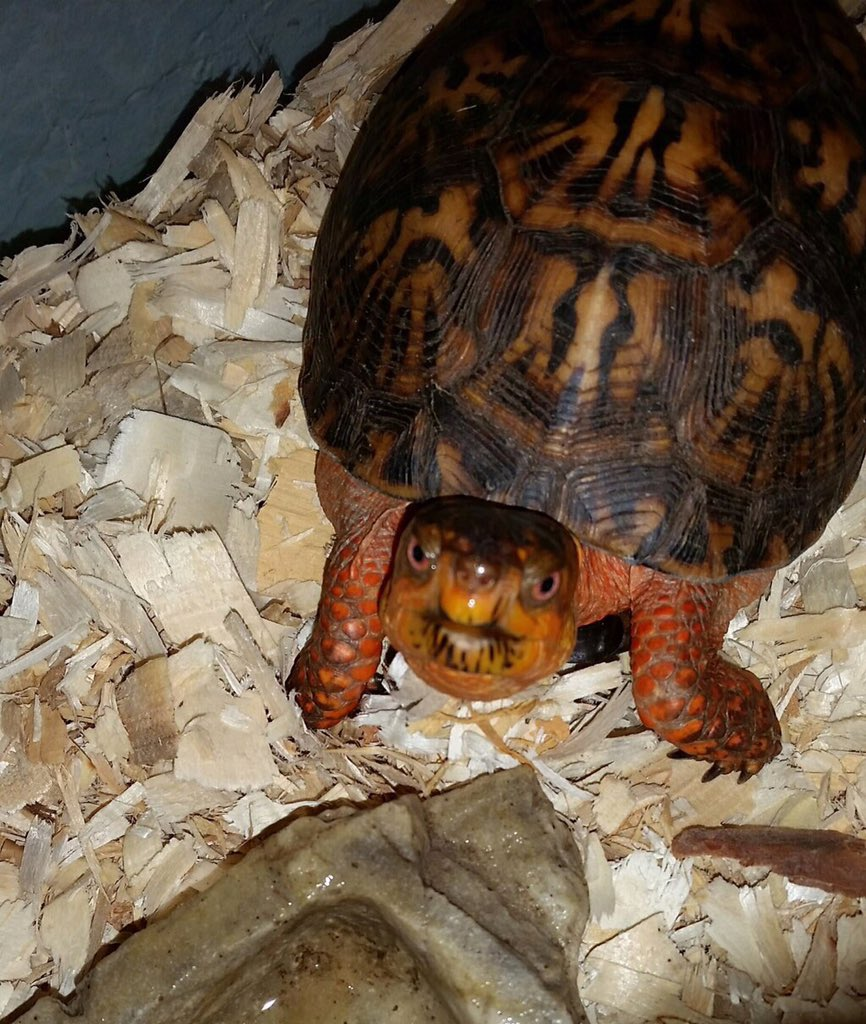

In [59]:
url=image_pred_copy.jpg_url[6]
display.Image(url)

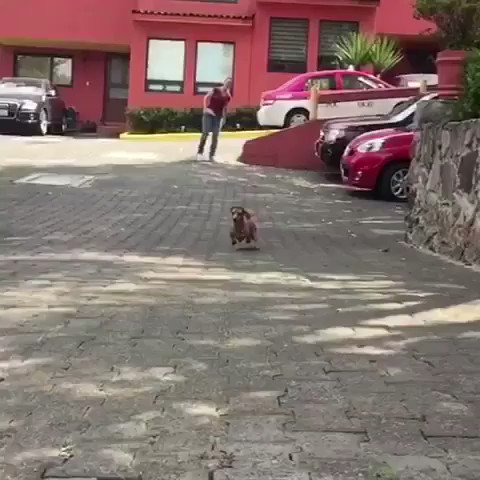

In [60]:
url= image_pred_copy.jpg_url[2052]
display.Image(url)

In [61]:
# now drop the rows that are false
image_copy= image_pred_copy[image_pred_copy['p1_dog']!= False]

# TEST

In [62]:
image_copy.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
510,676146341966438401,https://pbs.twimg.com/media/CWIngp5WEAAJOy3.jpg,1,Irish_water_spaniel,0.388332,True,standard_poodle,0.284121,True,greenhouse,0.034868,False
663,682662431982772225,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,1,beagle,0.413824,True,Cardigan,0.263553,True,basset,0.167618,True
731,686683045143953408,https://pbs.twimg.com/media/CYeWlh0WAAADhsj.jpg,1,Norwich_terrier,0.100499,True,cocker_spaniel,0.080671,True,golden_retriever,0.079406,True
349,672482722825261057,https://pbs.twimg.com/media/CVUjd14W4AE8tvO.jpg,1,West_Highland_white_terrier,0.586173,True,borzoi,0.206620,True,Great_Pyrenees,0.060653,True
1010,709409458133323776,https://pbs.twimg.com/media/CdhUIMSUIAA4wYK.jpg,1,Shetland_sheepdog,0.797450,True,collie,0.054055,True,keeshond,0.031673,True
1119,726224900189511680,https://pbs.twimg.com/media/ChQRsYaW0AETD7z.jpg,1,standard_poodle,0.261112,True,cocker_spaniel,0.094785,True,bucket,0.069946,False
469,675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,Labrador_retriever,0.631501,True,Brittany_spaniel,0.101927,True,Chesapeake_Bay_retriever,0.062650,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
157,668852170888998912,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,1,golden_retriever,0.903529,True,Tibetan_mastiff,0.041497,True,kuvasz,0.022500,True
278,670995969505435648,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,1,redbone,0.866221,True,beagle,0.061194,True,Rhodesian_ridgeback,0.024285,True


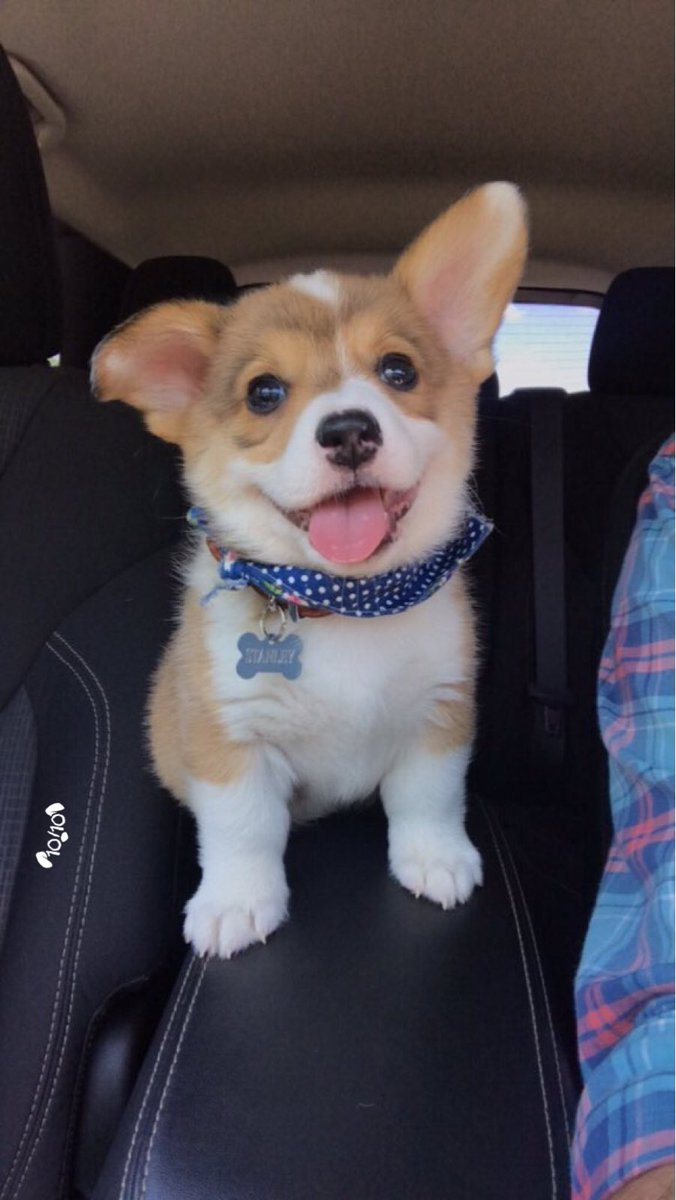

In [63]:
url= image_copy.jpg_url[1973]
display.Image(url)

# DEFINE
* P1, P2 and P3 should be in categorical format in image prediction dataset

# CODE

In [64]:
# lets check the value counts and convert to categorical columns
image_copy['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
Japanese_spaniel        1
Scotch_terrier          1
standard_schnauzer      1
EntleBucher             1
clumber                 1
Name: p1, Length: 111, dtype: int64

In [65]:
image_copy['p2'].value_counts()

Labrador_retriever    94
golden_retriever      76
Cardigan              70
Pomeranian            39
French_bulldog        35
                      ..
skunk                  1
tennis_ball            1
Christmas_stocking     1
paddle                 1
sea_lion               1
Name: p2, Length: 191, dtype: int64

In [66]:
image_copy['p3'].value_counts()

Labrador_retriever    67
Chihuahua             54
golden_retriever      38
kelpie                32
Eskimo_dog            32
                      ..
racket                 1
lion                   1
macaque                1
polecat                1
Indian_elephant        1
Name: p3, Length: 209, dtype: int64

In [67]:
len(image_copy)

1532

In [68]:
image_copy[['p1', 'p2', 'p3']]= image_copy[['p1', 'p2', 'p3']].astype('category')

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# TEST

In [69]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  1532 non-null   int64   
 1   jpg_url   1532 non-null   object  
 2   img_num   1532 non-null   int64   
 3   p1        1532 non-null   category
 4   p1_conf   1532 non-null   float64 
 5   p1_dog    1532 non-null   bool    
 6   p2        1532 non-null   category
 7   p2_conf   1532 non-null   float64 
 8   p2_dog    1532 non-null   bool    
 9   p3        1532 non-null   category
 10  p3_conf   1532 non-null   float64 
 11  p3_dog    1532 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 148.3+ KB


# DEFINE
* Remove image num as the column did not have any correlation with the dataset

# CODE

In [70]:
image_copy.drop('img_num', axis=1, inplace= True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# TEST

In [71]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  1532 non-null   int64   
 1   jpg_url   1532 non-null   object  
 2   p1        1532 non-null   category
 3   p1_conf   1532 non-null   float64 
 4   p1_dog    1532 non-null   bool    
 5   p2        1532 non-null   category
 6   p2_conf   1532 non-null   float64 
 7   p2_dog    1532 non-null   bool    
 8   p3        1532 non-null   category
 9   p3_conf   1532 non-null   float64 
 10  p3_dog    1532 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(1), object(1)
memory usage: 136.3+ KB


# DEFINE
* Convert Timestamp column to datetime datatype in twitter archive dataset

# CODE

In [72]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [73]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [74]:
# convert timestamp column to datetime data type
twitter_arch['timestamp']= pd.to_datetime(twitter_arch['timestamp'])

# TEST

In [75]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

# DEFINE
 * Some expanded url have more than one urls in expanded url column seperated by ',' in the twitter arch csv file, extract them into aother column

# CODE

In [76]:
 twitter_arch[['url_1', 'url_2', 'url_3', 'url_4', 'url_5', 'url_6', 'url_7', 'url_8']]= twitter_arch['expanded_urls'].str.split(',', expand= True)

In [77]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,pupper,puppo,url_1,url_2,url_3,url_4,url_5,url_6,url_7,url_8
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,None,None,https://twitter.com/dog_rates/status/892420643...,None,None,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,None,None,https://twitter.com/dog_rates/status/892177421...,None,None,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,None,None,https://twitter.com/dog_rates/status/891815181...,None,None,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,None,None,https://twitter.com/dog_rates/status/891689557...,None,None,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None,None,None,None


# TEST

In [78]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

# DEFINE
* Drop rows that did not have null value in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

# CODE

In [79]:
twitter_arch= twitter_arch[twitter_arch['retweeted_status_id'].isnull()]
twitter_arch= twitter_arch[twitter_arch['retweeted_status_user_id'].isnull()]
twitter_arch= twitter_arch[twitter_arch['retweeted_status_timestamp'].isnull()]

# TEST

In [80]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,pupper,puppo,url_1,url_2,url_3,url_4,url_5,url_6,url_7,url_8
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,None,None,https://twitter.com/dog_rates/status/892420643...,None,None,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,None,None,https://twitter.com/dog_rates/status/892177421...,None,None,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,None,None,https://twitter.com/dog_rates/status/891815181...,None,None,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,None,None,https://twitter.com/dog_rates/status/891689557...,None,None,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None,None,None,None


# DEFINE
* Drop retweeted columns 

# CODE

In [81]:
twitter_arch.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis= 1, inplace= True)

# TEST

In [82]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

# DEFINE
* There are dogs that doesnt have their name registered instead adverb and verbs is used to register their names, change their name to nan

# CODE

In [83]:
improper_name= twitter_archive['name'].str.islower()
column= 'name'
twitter_arch.loc[improper_name, column]= np.nan

# TEST

In [84]:
twitter_arch['name'].value_counts()

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

In [85]:
twitter_arch.sample(10)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pupper,puppo,url_1,url_2,url_3,url_4,url_5,url_6,url_7,url_8
1758,678755239630127104,NaN,NaN,2015-12-21 01:53:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dash. He didn't think the water would ...,https://twitter.com/dog_rates/status/678755239...,10,10,Dash,...,None,None,https://twitter.com/dog_rates/status/678755239...,None,None,None,None,None,None,None
1148,726887082820554753,NaN,NaN,2016-05-01 21:32:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Blitz. He's a new dad struggling to co...,https://twitter.com/dog_rates/status/726887082...,10,10,Blitz,...,None,None,https://twitter.com/dog_rates/status/726887082...,None,None,None,None,None,None,None
1385,700747788515020802,NaN,NaN,2016-02-19 18:24:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/700747788...,11,10,NaN,...,None,None,https://twitter.com/dog_rates/status/700747788...,None,None,None,None,None,None,None
1297,707776935007539200,NaN,NaN,2016-03-10 03:55:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,...,None,None,https://twitter.com/dog_rates/status/707776935...,None,None,None,None,None,None,None
540,806542213899489280,NaN,NaN,2016-12-07 16:53:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,https://twitter.com/dog_rates/status/806542213...,11,10,Waffles,...,None,None,https://twitter.com/dog_rates/status/806542213...,None,None,None,None,None,None,None
2012,672239279297454080,NaN,NaN,2015-12-03 02:21:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ridley. He doesn't know how to couch. ...,https://twitter.com/dog_rates/status/672239279...,7,10,Ridley,...,None,None,https://twitter.com/dog_rates/status/672239279...,None,None,None,None,None,None,None
1145,727175381690781696,NaN,NaN,2016-05-02 16:38:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Karll. He just wants to go kayaking. 1...,https://twitter.com/dog_rates/status/727175381...,10,10,Karll,...,None,None,https://twitter.com/dog_rates/status/727175381...,https://twitter.com/dog_rates/status/727175381...,None,None,None,None,None,None
2097,670733412878163972,NaN,NaN,2015-11-28 22:38:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a great listener. Low main...,https://twitter.com/dog_rates/status/670733412...,8,10,Jerry,...,None,None,https://twitter.com/dog_rates/status/670733412...,None,None,None,None,None,None,None
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,https://twitter.com/dog_rates/status/713411074...,11,10,None,...,None,None,https://twitter.com/dog_rates/status/713411074...,None,None,None,None,None,None,None
1420,698262614669991936,NaN,NaN,2016-02-12 21:49:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He's a yoga master. Trying t...,https://twitter.com/dog_rates/status/698262614...,11,10,Franklin,...,None,None,https://twitter.com/dog_rates/status/698262614...,None,None,None,None,None,None,None


In [86]:
twitter_arch.iloc[56]

tweet_id                                                880872448815771648
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2017-06-30 19:35:32+00:00
source                   <a href="http://twitter.com/download/iphone" r...
text                     Ugh not again. We only rate dogs. Please don't...
expanded_urls            https://twitter.com/dog_rates/status/880872448...
rating_numerator                                                        12
rating_denominator                                                      10
name                                                                  None
doggo                                                                 None
floofer                                                               None
pupper                                                                None
puppo                    

# TIDINESS ISSUE

# DEFINE
* Melt the Floofer, Doggo, Puppo, Pupper columns together because they are supposed to be in one column

In [87]:
# convert all none value in doggo, pupper, puppo and floofer to np.nan
twitter_arch['floofer']= twitter_arch['floofer'].replace('None', np.nan)
twitter_arch['doggo']= twitter_arch['doggo'].replace('None', np.nan)
twitter_arch['puppo']= twitter_arch['puppo'].replace('None', np.nan)
twitter_arch['pupper']= twitter_arch['pupper'].replace('None', np.nan)

In [88]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pupper,puppo,url_1,url_2,url_3,url_4,url_5,url_6,url_7,url_8
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,None,None,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,None,None,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,None,None,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,None,None,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None,None,None,None


In [89]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2071 non-null   object             
 10  doggo                  87 non-null     object             
 11  floofer                10 non-null     object           

In [90]:
twitter_arch= twitter_arch[twitter_arch.in_reply_to_status_id.isnull()]
twitter_arch= twitter_arch[twitter_arch.in_reply_to_user_id.isnull()]

In [91]:
# drop columns that have extra url values and also columns that doesnt have any null value
twitter_arch.drop(['expanded_urls','url_2', 'url_3', 'url_4','url_5','url_6','url_7', 'url_8','in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

In [92]:
twitter_arch= pd.melt(twitter_arch,
                      id_vars= ['tweet_id', 'timestamp','source','text', 'rating_numerator', 'rating_denominator','name','url_1'])

In [93]:
len(twitter_arch)

8388

In [94]:
twitter_arch.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
1256,693231807727280129,2016-01-30 00:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Bodie. He's not proud of what he did, ...",9,10,Bodie,https://twitter.com/dog_rates/status/693231807...,doggo,NaN
2147,881666595344535552,2017-07-03 00:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,13,10,Gary,https://twitter.com/dog_rates/status/881666595...,floofer,NaN
1809,671163268581498880,2015-11-30 03:06:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Pack of horned dogs here. Very team-oriented b...,8,10,None,https://twitter.com/dog_rates/status/671163268...,doggo,NaN
5980,671547767500775424,2015-12-01 04:33:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She chews shoes then feels ext...,10,10,Marley,https://twitter.com/dog_rates/status/671547767...,pupper,NaN
7438,702321140488925184,2016-02-24 02:36:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this picture as much as I did. 12...,12,10,None,https://twitter.com/dog_rates/status/702321140...,puppo,NaN
7299,714141408463036416,2016-03-27 17:25:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I know we only rate dogs, but since it's Easte...",10,10,None,https://twitter.com/dog_rates/status/714141408...,puppo,NaN
5764,676864501615042560,2015-12-15 20:40:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,10,10,Ash,https://twitter.com/dog_rates/status/676864501...,pupper,NaN
7785,679828447187857408,2015-12-24 00:58:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Everybody look at this beautiful pupper 13/10 ...,13,10,None,https://twitter.com/dog_rates/status/679828447...,puppo,NaN
6090,669683899023405056,2015-11-26 01:07:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kloey. Her mother was a unicorn. 10/10...,10,10,Kloey,https://twitter.com/dog_rates/status/669683899...,pupper,NaN
1721,673240798075449344,2015-12-05 20:41:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Magical floating dog here. Very calm. Always h...,6,10,None,https://twitter.com/dog_rates/status/673240798...,doggo,NaN


In [95]:
# remove rows that are not relevant
#twitter_arch = twitter_arch[twitter_arch['value']!= 'None']
twitter_arch.variable.value_counts()

doggo      2097
floofer    2097
pupper     2097
puppo      2097
Name: variable, dtype: int64

In [96]:
twitter_arch['tweet_id'].duplicated().sum()

6291

In [97]:
twitter_arch.value.value_counts()

pupper     230
doggo       83
puppo       24
floofer     10
Name: value, dtype: int64

In [98]:
# drop null values for value_counts
twitter_arch.dropna(inplace= True)
twitter_arch.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
336,821107785811234820,2017-01-16 21:32:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who looks like he's about to gi...,11,10,None,https://twitter.com/dog_rates/status/821107785...,doggo,doggo
710,757393109802180609,2016-07-25 01:52:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo completely oblivious to the dou...,10,10,None,https://twitter.com/dog_rates/status/757393109...,doggo,doggo
4654,797971864723324932,2016-11-14 01:18:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,12,10,None,https://twitter.com/dog_rates/status/797971864...,pupper,pupper
4852,765371061932261376,2016-08-16 02:14:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's had a long day. Did a lot ...,11,10,Louie,https://twitter.com/dog_rates/status/765371061...,pupper,pupper
622,771908950375665664,2016-09-03 03:13:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Doggo will persevere. 13/10\nhttps://t.co/yOVz...,13,10,None,https://twitter.com/yahoonews/status/771905568...,doggo,doggo
5116,728015554473250816,2016-05-05 00:16:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rueben. He has reached ultimate pupper...,11,10,Rueben,https://twitter.com/dog_rates/status/728015554...,pupper,pupper
4730,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,https://twitter.com/dog_rates/status/785639753...,pupper,pupper
5445,693590843962331137,2016-01-31 00:25:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,3,10,Phil,https://twitter.com/dog_rates/status/693590843...,pupper,pupper
4704,789903600034189313,2016-10-22 18:57:48+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,13,10,Ralphy,https://vine.co/v/5wPT1aBxPQZ,pupper,pupper
5308,705428427625635840,2016-03-03 16:23:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,11,10,Ambrose,https://twitter.com/dog_rates/status/705428427...,pupper,pupper


In [99]:
# check for duplicated value
twitter_arch.tweet_id.duplicated().sum()

10

In [100]:
twitter_arch[twitter_arch['tweet_id'].duplicated()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
2258,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,None,https://twitter.com/dog_rates/status/854010172...,floofer,floofer
4552,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,https://twitter.com/dog_rates/status/817777686...,pupper,pupper
4610,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,https://twitter.com/dog_rates/status/808106460...,pupper,pupper
4640,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12,10,Bones,https://twitter.com/dog_rates/status/801115127...,pupper,pupper
4730,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,https://twitter.com/dog_rates/status/785639753...,pupper,pupper
4756,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,https://vine.co/v/5rgu2Law2ut,pupper,pupper
4883,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,https://twitter.com/dog_rates/status/759793422...,pupper,pupper
4942,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,5,10,None,https://twitter.com/dog_rates/status/751583847...,pupper,pupper
5091,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",12,10,None,https://twitter.com/dog_rates/status/733109485...,pupper,pupper
6445,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,None,https://twitter.com/dog_rates/status/855851453...,puppo,puppo


In [101]:
twitter_arch[twitter_arch.tweet_id==854010172552949760]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
161,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,None,https://twitter.com/dog_rates/status/854010172...,doggo,doggo
2258,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,None,https://twitter.com/dog_rates/status/854010172...,floofer,floofer


In [102]:
# drop row 2258 because the dog stage is wrong
twitter_arch.drop(2258, axis= 0, inplace= True)

In [103]:
twitter_arch[twitter_arch.tweet_id==817777686764523521]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
358,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,https://twitter.com/dog_rates/status/817777686...,doggo,doggo
4552,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,https://twitter.com/dog_rates/status/817777686...,pupper,pupper


In [104]:
# Dido is not an inexperiece dog so it is definitely doggo
# drop row 4552
twitter_arch.drop(4552, axis= 0, inplace= True)

In [105]:
twitter_arch[twitter_arch.tweet_id==808106460588765185]


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
416,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,https://twitter.com/dog_rates/status/808106460...,doggo,doggo
4610,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,https://twitter.com/dog_rates/status/808106460...,pupper,pupper


In [106]:
# here there are two different dogs, burke and dexter, rename them, both have the same rating so i will change the name 
twitter_arch.loc[416]= twitter_arch.loc[416].replace('None', 'Dexter')
twitter_arch.loc[4610] =twitter_arch.loc[4610].replace('None','Burke')

In [107]:
twitter_arch[twitter_arch['tweet_id']==808106460588765185]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
416,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,Dexter,https://twitter.com/dog_rates/status/808106460...,doggo,doggo
4610,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,Burke,https://twitter.com/dog_rates/status/808106460...,pupper,pupper


In [108]:
twitter_arch[twitter_arch.tweet_id==801115127852503040]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
446,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12,10,Bones,https://twitter.com/dog_rates/status/801115127...,doggo,doggo
4640,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12,10,Bones,https://twitter.com/dog_rates/status/801115127...,pupper,pupper


In [109]:
# the text read'This is Bones. He's being haunted by another doggo of roughly the same size' This shows that bones is a doggo, 
# drop the pupper row
twitter_arch.drop(4640, axis= 0, inplace= True)

In [110]:
twitter_arch[twitter_arch['tweet_id']==785639753186217984]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
536,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,https://twitter.com/dog_rates/status/785639753...,doggo,doggo
4730,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,https://twitter.com/dog_rates/status/785639753...,pupper,pupper


In [111]:
# This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper: this text shows pinot is a doggo
# drop the pupper roe
twitter_arch.drop(4730, axis= 0, inplace= True)

In [112]:
twitter_arch[twitter_arch['tweet_id']==781308096455073793]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
562,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,https://vine.co/v/5rgu2Law2ut,doggo,doggo
4756,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,https://vine.co/v/5rgu2Law2ut,pupper,pupper


In [113]:
# there are two dogs in this tweets id, pupper butt1 and doggo 0, both have the same rate values, so i will just chenge the names
twitter_arch.loc[562]= twitter_arch.loc[562].replace('None', 'butt 1')
twitter_arch.loc[4756] =twitter_arch.loc[4756].replace('None','doggo 0')

In [114]:
twitter_arch[twitter_arch['tweet_id']==759793422261743616]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
689,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,https://twitter.com/dog_rates/status/759793422...,doggo,doggo
4883,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,https://twitter.com/dog_rates/status/759793422...,pupper,pupper


In [115]:
# there are two dog image in this row, maggie and lila, maggie is doggo, lila is a puppa
# there is name error in row 4883
# replace the name
twitter_arch.loc[4883] =twitter_arch.loc[4883].replace('Maggie','Lila')

In [116]:
twitter_arch[twitter_arch['tweet_id']==751583847268179968]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
748,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,5,10,None,https://twitter.com/dog_rates/status/751583847...,doggo,doggo
4942,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,5,10,None,https://twitter.com/dog_rates/status/751583847...,pupper,pupper


In [117]:
# there is no dog in these rows, the row i sa warning so we will drop them
twitter_arch.drop([748, 4942], axis=0, inplace= True)

In [118]:
twitter_arch[twitter_arch['tweet_id']==733109485275860992]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
897,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",12,10,None,https://twitter.com/dog_rates/status/733109485...,doggo,doggo
5091,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",12,10,None,https://twitter.com/dog_rates/status/733109485...,pupper,pupper


In [119]:
# there are two dogs in this row, father and son, amazing right
# rename the row to father and son
twitter_arch.loc[897]= twitter_arch.loc[897].replace('None', 'father')
twitter_arch.loc[5091] =twitter_arch.loc[5091].replace('None','son')

In [120]:
twitter_arch[twitter_arch['tweet_id']==855851453814013952]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,variable,value
154,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,None,https://twitter.com/dog_rates/status/855851453...,doggo,doggo
6445,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,None,https://twitter.com/dog_rates/status/855851453...,puppo,puppo


In [121]:
# the dog here is a puppo
# drop the second column
twitter_arch.drop(6445, axis=0, inplace= True)

# TEST

In [122]:
twitter_arch.tweet_id.duplicated().sum()

4

In [123]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 9 to 7158
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            324 non-null    int64              
 1   timestamp           324 non-null    datetime64[ns, UTC]
 2   source              324 non-null    object             
 3   text                324 non-null    object             
 4   rating_numerator    324 non-null    int64              
 5   rating_denominator  324 non-null    int64              
 6   name                324 non-null    object             
 7   url_1               324 non-null    object             
 8   variable            324 non-null    object             
 9   value               324 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 27.8+ KB


In [124]:
twitter_arch.variable.value_counts()

pupper     213
doggo       79
puppo       23
floofer      9
Name: variable, dtype: int64

In [125]:
len(twitter_arch)

324

In [126]:
# rename value column to stage of dog and drop variable column
twitter_arch= twitter_arch.rename(columns= {'value':'dog_stage'})
twitter_arch.drop('variable', axis= 1, inplace= True)

In [127]:
len(twitter_arch)

324

# TEST

In [128]:
twitter_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,dog_stage
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://twitter.com/dog_rates/status/890240255...,doggo
39,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,https://twitter.com/dog_rates/status/884162670...,doggo
86,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12,10,None,https://twitter.com/dog_rates/status/872967104...,doggo
94,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,https://twitter.com/dog_rates/status/871515927...,doggo
95,871102520638267392,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,None,https://twitter.com/animalcog/status/871075758...,doggo


# DEFINE
* Merge all dataset together

# CODE

In [129]:
dog_dataset= pd.merge(twitter_arch, image_copy, on= 'tweet_id')

In [130]:
dog_dataset.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://twitter.com/dog_rates/status/890240255...,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,https://twitter.com/dog_rates/status/884162670...,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12,10,None,https://twitter.com/dog_rates/status/872967104...,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,https://twitter.com/dog_rates/status/871515927...,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,10,Scout,https://twitter.com/dog_rates/status/869596645...,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False


In [131]:
dog_dataset= pd.merge(dog_dataset, tweets_count_copy, left_on='tweet_id', right_on= 'tweets_id')

# TEST

In [132]:
dog_dataset.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,dog_stage,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,tweets_id,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://twitter.com/dog_rates/status/890240255...,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,9,890240255349198849,6109,27990
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,https://twitter.com/dog_rates/status/884162670...,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,...,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,42,884162670584377345,2511,17972
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12,10,None,https://twitter.com/dog_rates/status/872967104...,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,...,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,97,872967104147763200,4570,24121
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,https://twitter.com/dog_rates/status/871515927...,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,...,briard,0.020041,True,swab,0.003228,False,104,871515927908634625,2952,17915
4,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,10,Scout,https://twitter.com/dog_rates/status/869596645...,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,...,toy_terrier,0.008054,True,muzzle,0.006296,False,116,869596645499047938,2643,14233


# QUALITY ISSUE

# DEFINE
 * Tweet id and Tweets id duplicated, drop duplicated value

# CODE

In [133]:
dog_dataset.drop('tweets_id', axis= 1, inplace= True)

# TEST

In [134]:
dog_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            165 non-null    int64              
 1   timestamp           165 non-null    datetime64[ns, UTC]
 2   source              165 non-null    object             
 3   text                165 non-null    object             
 4   rating_numerator    165 non-null    int64              
 5   rating_denominator  165 non-null    int64              
 6   name                165 non-null    object             
 7   url_1               165 non-null    object             
 8   dog_stage           165 non-null    object             
 9   jpg_url             165 non-null    object             
 10  p1                  165 non-null    category           
 11  p1_conf             165 non-null    float64            
 12  p1_dog              165 non-null    

# STORING DATA

In [135]:
# Store the master dataset 
dog_dataset.to_csv('twitter_archive_master.csv', index= False)

# ANALYZING AND VISUALIZATION

In [136]:
# lets check how many dog stage we have
dog_dataset.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,retweet_count,favorite_count
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,https://twitter.com/dog_rates/status/884162670...,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,...,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,42,2511,17972
134,674774481756377088,2015-12-10 02:15:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Superpup. His head isn't proportional ...,11,10,Superpup,https://twitter.com/dog_rates/status/674774481...,pupper,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,...,True,French_bulldog,0.309978,True,Siamese_cat,0.227677,False,1363,415,993
120,679777920601223168,2015-12-23 21:37:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,10,10,Rinna,https://twitter.com/dog_rates/status/679777920...,pupper,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,...,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True,1207,1000,2862
110,681891461017812993,2015-12-29 17:36:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,10,10,Charlie,https://twitter.com/dog_rates/status/681891461...,pupper,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,...,True,doormat,0.134316,False,toy_terrier,0.084482,True,1157,749,2278
38,782305867769217024,2016-10-01 19:47:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He just graduated. Ready to b...,12,10,Sampson,https://twitter.com/dog_rates/status/782305867...,doggo,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,...,True,soft-coated_wheaten_terrier,0.390678,True,Lhasa,0.034596,True,707,5138,15748


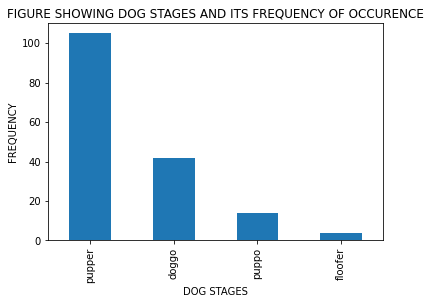

In [137]:
dog_dataset['dog_stage'].value_counts().plot.bar(xlabel= 'DOG STAGES', ylabel= 'FREQUENCY',
                                                 title= 'FIGURE SHOWING DOG STAGES AND ITS FREQUENCY OF OCCURENCE');

# INSIGHT
* Pupper is the most frequent stage of the dogs recorded

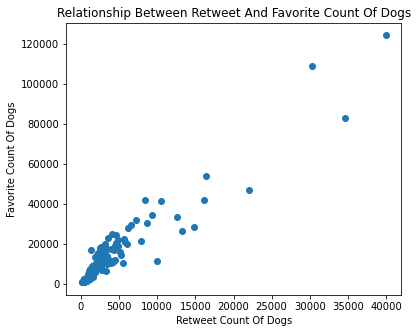

In [138]:
# let check if retweet count has a relationship with favourite count
x= dog_dataset.retweet_count
y= dog_dataset.favorite_count
def scatter_plot(x,y):
    fig, ax= plt.subplots(figsize= (6,5))
    plt.scatter(x, y)
    ax.set(xlabel= 'Retweet Count Of Dogs', ylabel= 'Favorite Count Of Dogs',
           title= 'Relationship Between Retweet And Favorite Count Of Dogs')
    
scatter_plot(x,y)

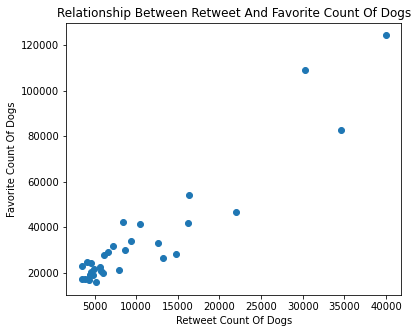

In [139]:
# Remove outliers so as to capture all value
quantile= dog_dataset.query('retweet_count> retweet_count.quantile(0.75) and favorite_count>favorite_count.quantile(0.75)')
x_q= quantile['retweet_count']
y_q= quantile['favorite_count']
# plot the graph

scatter_plot(x_q, y_q)

#  INSIGHT
* Retweet count and favorite count of the dogs has positive correlation, as the retweet count is rising, the favorite count is also rising

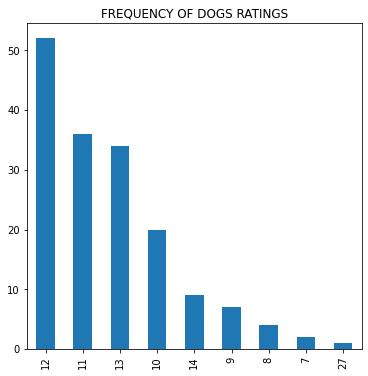

In [140]:
# Check most common rate people are giving dogs in this dataset
dog_dataset.rating_numerator.value_counts().plot.bar(title= 'FREQUENCY OF DOGS RATINGS', figsize= (6,6));

# INSIGHT
* Twelve is the most popular numerator ratings for dogs in WeRateDogs

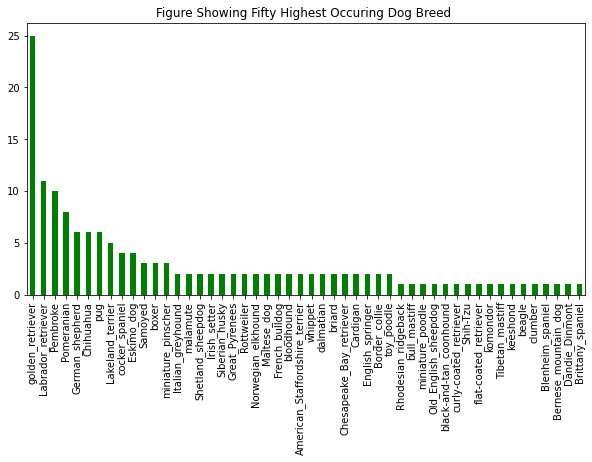

In [141]:
# check the different breeds of dogs that are in p1 dataset and crosstab the first 10 with dog stage
dog_dataset['p1'].value_counts()[:50].plot.bar(title= 'Figure Showing Fifty Highest Occuring Dog Breed ',
                                              figsize= (10,5),color= 'green');

# INSIGHT
* Golden Retriever, Labrador Retriever and Pembroke is the three highest occuring dog breed in the dataset

In [142]:
a= dog_dataset[dog_dataset['p1']=='golden_retriever']
a= dog_dataset[dog_dataset['dog_stage']=='pupper']
a.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_1,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,retweet_count,favorite_count
99,686377065986265092,2016-01-11 02:40:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Birf. He thinks he's gone blind. 10/10 ve...,10,10,Birf,https://twitter.com/dog_rates/status/686377065...,pupper,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,...,True,Leonberg,0.076325,True,bloodhound,0.037449,True,1069,516,2057
64,822462944365645825,2017-01-20 15:17:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,14,10,Gabe,https://twitter.com/dog_rates/status/822462944...,pupper,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,...,True,Samoyed,0.023056,True,Maltese_dog,0.008945,True,400,13182,26355
55,854120357044912130,2017-04-17 23:52:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,14,10,None,https://twitter.com/dog_rates/status/854120357...,pupper,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,...,True,Doberman,0.050792,True,bluetick,0.021762,True,190,6610,29286
65,815966073409433600,2017-01-02 17:00:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with squeaky hiccups. Please e...,13,10,None,https://twitter.com/dog_rates/status/815966073...,pupper,https://pbs.twimg.com/ext_tw_video_thumb/81596...,...,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,460,7888,21179
112,681654059175129088,2015-12-29 01:52:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,12,10,Toffee,https://twitter.com/dog_rates/status/681654059...,pupper,https://pbs.twimg.com/media/CXW4wGHWsAE_eBD.jpg,...,True,chow,0.146892,True,Pekinese,0.037613,True,1160,822,2430


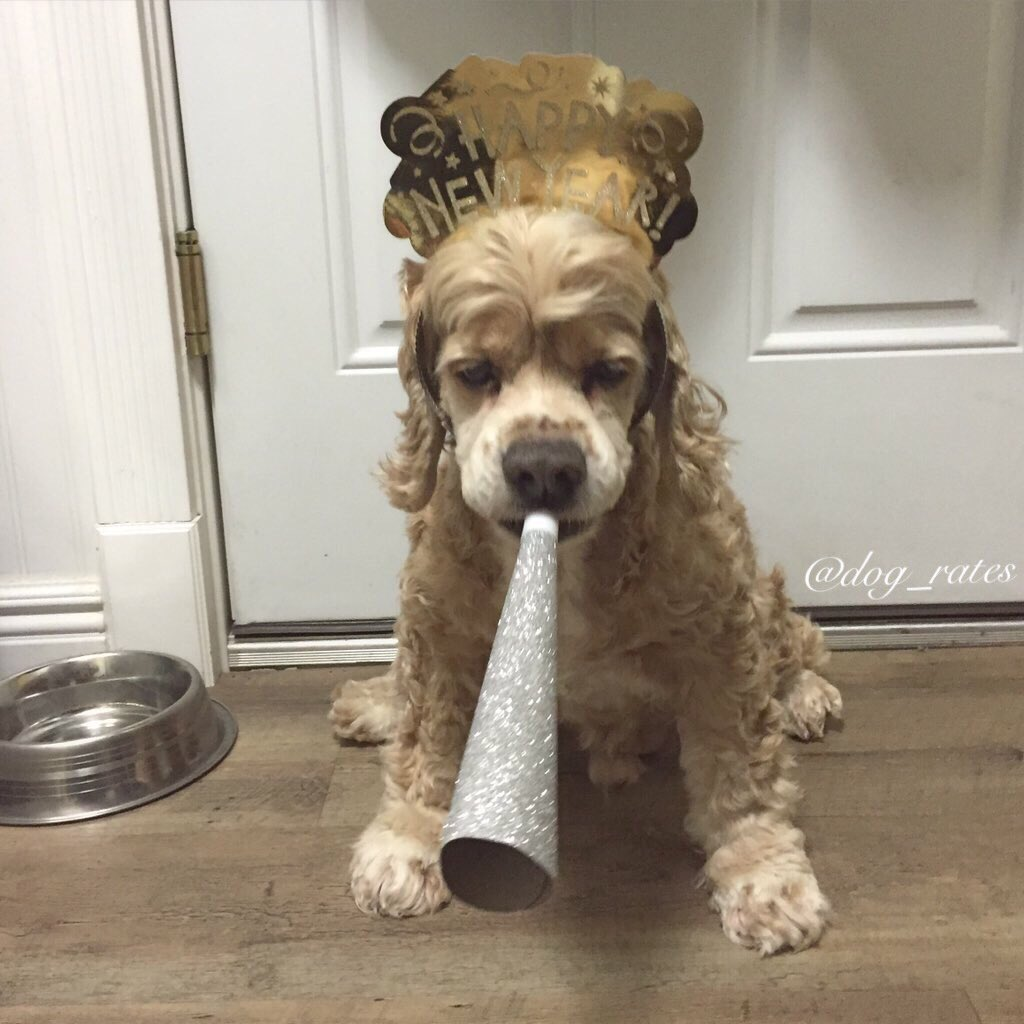

In [143]:
img= dog_dataset.jpg_url[109]
display.Image(img)